In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', None)

df = pd.read_csv("/content/project_data.csv")


In [2]:
print(df.dtypes)

SEQN                            int64
depression                      int64
Used Drugs                    float64
height(in)                      int64
weight(pound)                   int64
has diabetes?                   int64
#people in family               int64
ALQ120Q                       float64
alc_drinks_perday             float64
5_drinks_perday/ALQ150        float64
Gender                          int64
Age                             int64
Educationlevel                  int64
maritalStatus                   int64
INDFMPIR/Poverty threshold    float64
dtype: object


In [3]:
df.head(10)

,SEQN,depression,Used Drugs,height(in),weight(pound),has diabetes?,#people in family,ALQ120Q,alc_drinks_perday,5_drinks_perday/ALQ150,Gender,Age,Educationlevel,maritalStatus,INDFMPIR/Poverty threshold
0,41475,0,2.0,62,308,2,2,0.0,NaN,2.0,2,62,3,1,1.83
1,41477,0,NaN,68,190,1,2,0.0,NaN,2.0,1,71,3,1,1.50
2,41479,0,2.0,67,142,2,5,3.0,5.0,2.0,1,52,1,1,2.20
3,41481,0,2.0,73,175,2,4,3.0,4.0,2.0,1,21,3,5,1.63
4,41482,1,9.0,68,228,2,6,1.0,4.0,1.0,1,64,2,1,4.01
5,41483,0,2.0,71,289,1,3,0.0,NaN,2.0,1,66,4,1,1.14
6,41485,1,2.0,63,138,2,5,NaN,NaN,NaN,2,30,2,1,1.01
7,41486,0,2.0,64,187,2,3,NaN,NaN,NaN,2,61,1,1,1.75
8,41487,0,2.0,68,150,2,1,1.0,1.0,2.0,1,27,5,5,5.00
9,41489,0,2.0,63,200,2,3,3.0,5.0,2.0,2,40,3,1,2.15


# Check % of Null values in each column

In [4]:
# calculate percentage of missing values in each column
missing_pct = df.isna().mean() * 100

print(missing_pct)

SEQN                           0.000000
depression                     0.000000
Used Drugs                    18.959173
height(in)                     0.000000
weight(pound)                  0.000000
has diabetes?                  0.000000
#people in family              0.000000
ALQ120Q                       22.305940
alc_drinks_perday             41.773261
5_drinks_perday/ALQ150        22.305940
Gender                         0.000000
Age                            0.000000
Educationlevel                 0.000000
maritalStatus                  0.000000
INDFMPIR/Poverty threshold     9.286841
dtype: float64


In [5]:
# Dropping column alc_drinks_perday as it has more than 40% null values
df = df.drop('alc_drinks_perday',axis=1)

In [6]:
df.shape

(5707, 14)

# Check and drop Duplicates in the dataframe

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(5707, 14)

# Cleaning SEQN column

**Rename the sequence number to person. This is a unique identifier of a person**

> Indented block



In [9]:
df=df.rename(columns={"SEQN": "Person"})

# Cleaning of Age column

In [10]:
df['Age'].describe()

count    5707.000000
mean       51.196776
std        29.869115
min        20.000000
25%        36.000000
50%        50.000000
75%        65.000000
max      1300.000000
Name: Age, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

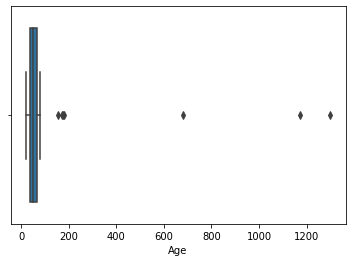

In [11]:
sns.boxplot(df['Age'])

In [12]:
# calculate the IQR of 'Age'
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1

# identify outliers in 'Age'
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = df.loc[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

In [13]:
df= df[(df['Age'] < upper_bound) & (df['Age'] > lower_bound)]

<AxesSubplot:xlabel='Age'>

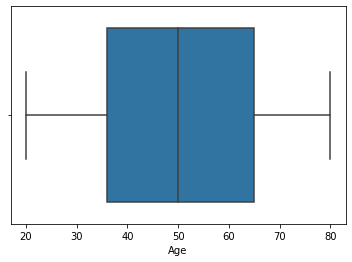

In [14]:
sns.boxplot(x=df['Age'])

# Cleaning of depression column

**In the depression column, set the values with 2 or 3 to 1. The final output will have either 0 (No) or 1 (yes)**

In [15]:
df.loc[(df['depression'] == 1) | (df['depression'] == 2) | (df['depression'] == 3), 'depression'] = 1
null_values = df['depression'].isnull().sum()
print(null_values)


0


**In the depression column, drop the rows with values 7 and 9 as it does not contribute any value to the process**

In [16]:
#dropping rows where depression is equal to 7 or 9
depression_drop = df[(df['depression'] == 7) | (df['depression'] == 9) ].index
df.drop(depression_drop , inplace=True)

In [17]:
df.shape

(5696, 14)

In [18]:
df = df.reset_index(drop=True)
df.head(10)

,Person,depression,Used Drugs,height(in),weight(pound),has diabetes?,#people in family,ALQ120Q,5_drinks_perday/ALQ150,Gender,Age,Educationlevel,maritalStatus,INDFMPIR/Poverty threshold
0,41475,0,2.0,62,308,2,2,0.0,2.0,2,62,3,1,1.83
1,41477,0,NaN,68,190,1,2,0.0,2.0,1,71,3,1,1.50
2,41479,0,2.0,67,142,2,5,3.0,2.0,1,52,1,1,2.20
3,41481,0,2.0,73,175,2,4,3.0,2.0,1,21,3,5,1.63
4,41482,1,9.0,68,228,2,6,1.0,1.0,1,64,2,1,4.01
5,41483,0,2.0,71,289,1,3,0.0,2.0,1,66,4,1,1.14
6,41485,1,2.0,63,138,2,5,NaN,NaN,2,30,2,1,1.01
7,41486,0,2.0,64,187,2,3,NaN,NaN,2,61,1,1,1.75
8,41487,0,2.0,68,150,2,1,1.0,2.0,1,27,5,5,5.00
9,41489,0,2.0,63,200,2,3,3.0,2.0,2,40,3,1,2.15


# Cleaning of 'Used Drugs' column.
1. Drop rows with values 7,9,null
2. Update the value 2 to 0

In [19]:
#dropping rows where Drugs consumed is equal to 7 or 9
drugs_drop = df[(df['Used Drugs'] == 7) | (df['Used Drugs'] == 9) | df['Used Drugs'].isnull() ].index
df.drop(drugs_drop , inplace=True)

In [20]:
# select the rows where the column value is 2 and update it to 0
df.loc[df['Used Drugs'] == 2, 'Used Drugs'] = 0

In [21]:

#df.loc[(df['Used Drugs'] == 1) | (df['depression'] == 2) | (df['depression'] == 3), 'depression'] = 1
null_values = df['Used Drugs'].isnull().sum()
print(null_values)


0


In [22]:
df.shape

(4590, 14)

# Calculating BMI from height and weight columns

BMI = Weight / (Height ** 2)

Convert the Weight into Kg and Height into meters

In [23]:
#dropping rows where height and weigt are null or 0
drop_records = df[df['height(in)'].isnull() | df['height(in)'] == 0].index
df.drop(drop_records , inplace=True)

drop_records = df[df['weight(pound)'].isnull()| df['weight(pound)'] == 0].index
df.drop(drop_records , inplace=True)


In [24]:
# convert height from inches to meters
df['height_m'] = df['height(in)'] * 0.0254

# convert weight from pounds to kilograms
df['weight_kg'] = df['weight(pound)'] * 0.45359237

In [25]:
# calculate the BMI
df['BMI'] = df['weight_kg'] / (df['height_m'] ** 2)

In [26]:
# drop height and weight columns from data frame
df = df.drop('height(in)', axis=1)
df = df.drop('weight(pound)',axis=1)

In [27]:
df = df.drop('height_m', axis=1)
df = df.drop('weight_kg',axis=1)

In [28]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

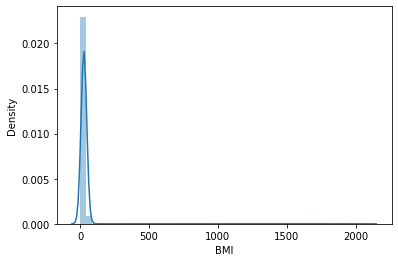

In [29]:
sns.distplot(df['BMI'])

In [30]:
df['BMI'].describe()

count    4494.000000
mean       34.706702
std       105.122199
min         0.000584
25%        23.932669
50%        27.397229
75%        31.647869
max      2089.771916
Name: BMI, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

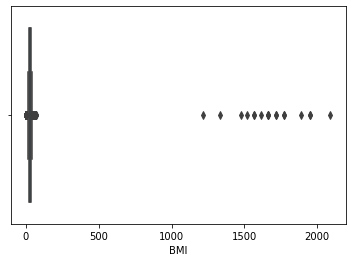

In [31]:
sns.boxplot(df['BMI'])

In [32]:
# calculate the IQR of 'column1'
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3 - q1

# identify outliers in 'column1'
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = df.loc[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]


In [33]:
df= df[(df['BMI'] < upper_bound) & (df['BMI'] > lower_bound)]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

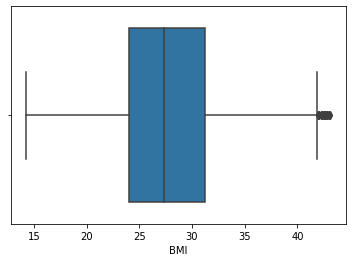

In [34]:
sns.boxplot(df['BMI'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

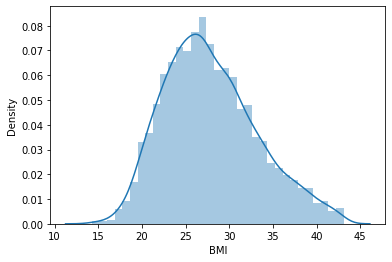

In [35]:
sns.distplot(df['BMI'])

In [36]:
df.shape


(4292, 13)

In [37]:
df.head()

,Person,depression,Used Drugs,has diabetes?,#people in family,ALQ120Q,5_drinks_perday/ALQ150,Gender,Age,Educationlevel,maritalStatus,INDFMPIR/Poverty threshold,BMI
2,41479,0,0.0,2,5,3.0,2.0,1,52,1,1,2.20,22.240116
3,41481,0,0.0,2,4,3.0,2.0,1,21,3,5,1.63,23.088230
5,41483,0,0.0,1,3,0.0,2.0,1,66,4,1,1.14,40.306905
6,41485,1,0.0,2,5,NaN,NaN,2,30,2,1,1.01,24.445352
7,41486,0,0.0,2,3,NaN,NaN,2,61,1,1,1.75,32.098147


# Cleaning of 'has diabetes?' column

1. Update the value 3 as 1
2. Remove rows with values 7 or 9
3. Update the value 2 as 0
4. Rename the column to 'isDiabetic'

In [38]:
df.loc[(df['has diabetes?'] == 3) , 'has diabetes?'] = 1
#dropping rows where value is equal to 7 or 9
diabetes_drop = df[(df['has diabetes?'] == 7) | (df['has diabetes?'] == 9) | df['has diabetes?'].isnull() ].index
df.drop(diabetes_drop , inplace=True)


In [39]:
# select the rows where the column value is 2 and update it to 0
df.loc[df['has diabetes?'] == 2, 'has diabetes?'] = 0

In [40]:
# Rename the column name to 'isDiabetic'
df = df.rename(columns={'has diabetes?': 'isDiabetic'})

In [41]:
df.head()

,Person,depression,Used Drugs,isDiabetic,#people in family,ALQ120Q,5_drinks_perday/ALQ150,Gender,Age,Educationlevel,maritalStatus,INDFMPIR/Poverty threshold,BMI
2,41479,0,0.0,0,5,3.0,2.0,1,52,1,1,2.20,22.240116
3,41481,0,0.0,0,4,3.0,2.0,1,21,3,5,1.63,23.088230
5,41483,0,0.0,1,3,0.0,2.0,1,66,4,1,1.14,40.306905
6,41485,1,0.0,0,5,NaN,NaN,2,30,2,1,1.01,24.445352
7,41486,0,0.0,0,3,NaN,NaN,2,61,1,1,1.75,32.098147


# Cleaning of 5_drinks_perday column

Values: 1 - Yes, 2 - No

1. Remove rows with values 7,9,null 
2. Update 2 as 0
3. Rename the column name to "isAlcoholic"


In [42]:
# Rename the column name to 'isAlcoholic'
df = df.rename(columns={'5_drinks_perday/ALQ150': 'isAlcoholic'})

In [43]:
#dropping rows where value is 7 or 9
isAlcoholic_v = df[df['isAlcoholic'].isnull() | (df['isAlcoholic']==7) | (df['isAlcoholic']==9)].index
df.drop(isAlcoholic_v , inplace=True)

In [44]:
# select the rows where the column value is 2 and update it to 0
df.loc[df['isAlcoholic'] == 2, 'isAlcoholic'] = 0

In [45]:
df = df.reset_index(drop=True)
df.head()

,Person,depression,Used Drugs,isDiabetic,#people in family,ALQ120Q,isAlcoholic,Gender,Age,Educationlevel,maritalStatus,INDFMPIR/Poverty threshold,BMI
0,41479,0,0.0,0,5,3.0,0.0,1,52,1,1,2.20,22.240116
1,41481,0,0.0,0,4,3.0,0.0,1,21,3,5,1.63,23.088230
2,41483,0,0.0,1,3,0.0,0.0,1,66,4,1,1.14,40.306905
3,41487,0,0.0,0,1,1.0,0.0,1,27,5,5,5.00,22.807188
4,41489,0,0.0,0,3,3.0,0.0,2,40,3,1,2.15,35.428046


In [46]:
df.shape

(3441, 13)

In [47]:
# Dropping column ALQ120Q as it is not required
df = df.drop('ALQ120Q',axis=1)

# Cleaning EducationLevel column

1. Renaming it to 'CompletedHighSchool'
2. Setting values to 1 or 0 accordingly

In [48]:
df=df.rename(columns={"Educationlevel": "CompletedHighSchool"})



In [49]:
df.loc[(df['CompletedHighSchool'] <= 2), 'CompletedHighSchool'] = 0
df.loc[(df['CompletedHighSchool'] >= 3), 'CompletedHighSchool'] = 1



In [50]:
df.head()

,Person,depression,Used Drugs,isDiabetic,#people in family,isAlcoholic,Gender,Age,CompletedHighSchool,maritalStatus,INDFMPIR/Poverty threshold,BMI
0,41479,0,0.0,0,5,0.0,1,52,0,1,2.20,22.240116
1,41481,0,0.0,0,4,0.0,1,21,1,5,1.63,23.088230
2,41483,0,0.0,1,3,0.0,1,66,1,1,1.14,40.306905
3,41487,0,0.0,0,1,0.0,1,27,1,5,5.00,22.807188
4,41489,0,0.0,0,3,0.0,2,40,1,1,2.15,35.428046


# Cleaning maritalStatus column

1. Drop rows with values 77 or 99
2. Group 2, 3, 4 to 2 (widowed, seperated, Divorced)
3. Group 5, 6 and update it to 0 (never married)

In [51]:
#dropping rows where value is equal to 77 or 99
marital_drop = df[ (df['maritalStatus'] == 99) | (df['maritalStatus'] == 77) | df['maritalStatus'].isnull() ].index
df.drop(marital_drop , inplace=True)

In [52]:
# Group 2, 3, 4 to 2
df.loc[(df['maritalStatus'] == 3) | (df['maritalStatus'] == 4) , 'maritalStatus'] = 2

# Group 5, 6 to 0 
df.loc[(df['maritalStatus'] == 5) | (df['maritalStatus'] == 6) , 'maritalStatus'] = 0

In [53]:
print(df['maritalStatus'].unique())

[1 0 2]


# Cleaning Family Size column 

1. Rename the column to familySize
2. if value = 1 then Single
      value = 2,3,4 then Small
      value = 5,6,7 then Big

In [54]:
# get the count of distinct values in 'column1'
distinct_count = df['#people in family'].value_counts()
print(distinct_count)

2    869
1    669
3    648
4    581
5    343
6    172
7    158
Name: #people in family, dtype: int64


In [55]:
# df=df.rename(columns={"#people in family": "familySize"})

In [56]:
df['familySize'] = df['#people in family']

In [57]:
df.loc[df['familySize'] == 1, 'familySize'] = 'Single'

In [58]:
df.loc[((df['familySize']) == 2) | ((df['familySize']) ==3) | ((df['familySize']) ==4), 'familySize'] = 'Small'

In [59]:
df.loc[((df['familySize']) == 5) | ((df['familySize']) ==6) | ((df['familySize']) ==7), 'familySize'] = 'Big'

In [60]:
# get the count of distinct values in 'column1'
distinct_count = df['familySize'].value_counts()
print(distinct_count)

Small     2098
Big        673
Single     669
Name: familySize, dtype: int64


In [61]:
df.shape

(3440, 13)

In [62]:
df.head()

,Person,depression,Used Drugs,isDiabetic,#people in family,isAlcoholic,Gender,Age,CompletedHighSchool,maritalStatus,INDFMPIR/Poverty threshold,BMI,familySize
0,41479,0,0.0,0,5,0.0,1,52,0,1,2.20,22.240116,Big
1,41481,0,0.0,0,4,0.0,1,21,1,0,1.63,23.088230,Small
2,41483,0,0.0,1,3,0.0,1,66,1,1,1.14,40.306905,Small
3,41487,0,0.0,0,1,0.0,1,27,1,0,5.00,22.807188,Single
4,41489,0,0.0,0,3,0.0,2,40,1,1,2.15,35.428046,Small


# Cleaning poverty threshold column and creating a new column based on it

1. Create a new column 'finStatus' based on poverty threshold column

In [63]:
# Renaming column INDFMPIR/Poverty threshold to povertyThreshold

df=df.rename(columns={"INDFMPIR/Poverty threshold": "povertyThreshold"})

In [64]:
df['povertyThreshold'].describe()

count    3183.000000
mean        2.690440
std         1.675414
min         0.000000
25%         1.180000
50%         2.350000
75%         4.640000
max         5.000000
Name: povertyThreshold, dtype: float64

<AxesSubplot:xlabel='povertyThreshold'>

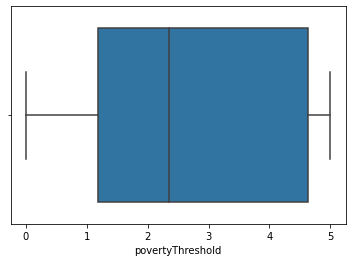

In [65]:
sns.boxplot(x=df['povertyThreshold'])

In [66]:
# define a function to categorize the financial status of an individual
def categorize_finStatus(value):
    if  value <= 2:
        return 'Poor'
    elif value > 2 and value < 4:
        return 'Middle class'
    elif value >= 4 and value <= 5:
        return 'Rich'
    else:
        return None

In [67]:
# apply the categorize function to the 'values' column of the dataframe
df['finStatus'] = df['povertyThreshold'].apply(categorize_finStatus)


In [68]:
distinct_count = df['finStatus'].value_counts()
print(distinct_count)

Poor            1415
Rich             980
Middle class     788
Name: finStatus, dtype: int64


In [69]:
df.head()

,Person,depression,Used Drugs,isDiabetic,#people in family,isAlcoholic,Gender,Age,CompletedHighSchool,maritalStatus,povertyThreshold,BMI,familySize,finStatus
0,41479,0,0.0,0,5,0.0,1,52,0,1,2.20,22.240116,Big,Middle class
1,41481,0,0.0,0,4,0.0,1,21,1,0,1.63,23.088230,Small,Poor
2,41483,0,0.0,1,3,0.0,1,66,1,1,1.14,40.306905,Small,Poor
3,41487,0,0.0,0,1,0.0,1,27,1,0,5.00,22.807188,Single,Rich
4,41489,0,0.0,0,3,0.0,2,40,1,1,2.15,35.428046,Small,Middle class


# Assigning weight category based on BMI

1. If BMI is less than 18.5, it falls within the underweight range.
2. If BMI is 18.5 to <25, it falls within the healthy weight range.
3. If BMI is 25.0 to <30, it falls within the overweight range.
4. If BMI is 30.0 or higher, it falls within the obesity range.

In [70]:
def categorize_weight(value):
  if value < 18.5:
    return "Under Weight"
  elif value >= 18.5 and value < 25:
    return "Healthy"
  elif value >= 25 and value < 30:
    return "Overweight"
  elif value >=30:
    return "Obese"

In [71]:
df['weightCategory'] = df['BMI'].apply(categorize_weight)

In [72]:
print(df['weightCategory'].value_counts())

Overweight      1246
Obese           1102
Healthy         1045
Under Weight      47
Name: weightCategory, dtype: int64


In [73]:
df.head()

,Person,depression,Used Drugs,isDiabetic,#people in family,isAlcoholic,Gender,Age,CompletedHighSchool,maritalStatus,povertyThreshold,BMI,familySize,finStatus,weightCategory
0,41479,0,0.0,0,5,0.0,1,52,0,1,2.20,22.240116,Big,Middle class,Healthy
1,41481,0,0.0,0,4,0.0,1,21,1,0,1.63,23.088230,Small,Poor,Healthy
2,41483,0,0.0,1,3,0.0,1,66,1,1,1.14,40.306905,Small,Poor,Obese
3,41487,0,0.0,0,1,0.0,1,27,1,0,5.00,22.807188,Single,Rich,Healthy
4,41489,0,0.0,0,3,0.0,2,40,1,1,2.15,35.428046,Small,Middle class,Obese


In [74]:
print(df.dtypes)

Person                   int64
depression               int64
Used Drugs             float64
isDiabetic               int64
#people in family        int64
isAlcoholic            float64
Gender                   int64
Age                      int64
CompletedHighSchool      int64
maritalStatus            int64
povertyThreshold       float64
BMI                    float64
familySize              object
finStatus               object
weightCategory          object
dtype: object


# Updating gender values to male or female as it will be easy to categorize

In [75]:
df.loc[df['Gender'] == 1, 'Gender'] = 'Male'
df.loc[df['Gender'] == 2, 'Gender'] = 'Female'

In [130]:
df.sample(5)

,Person,depression,Used Drugs,isDiabetic,#people in family,isAlcoholic,Gender,Age,CompletedHighSchool,maritalStatus,povertyThreshold,BMI,familySize,finStatus,weightCategory,age_cluster
740,43695,1,0.0,0,2,0.0,Female,33,1,1,5.00,29.121225,Small,Rich,Overweight,40-50
2310,48365,1,0.0,0,2,0.0,Female,53,0,1,1.83,32.922093,Small,Poor,Obese,20-30
284,42381,0,0.0,0,5,0.0,Male,24,0,0,0.46,27.319444,Big,Poor,Overweight,30-40
2062,47571,0,0.0,0,1,0.0,Male,38,1,0,0.71,38.837912,Single,Poor,Obese,40-50
2056,47541,1,0.0,0,4,1.0,Male,31,0,1,0.02,19.370284,Small,Poor,Healthy,40-50


In [77]:
#dropping rows where Drugs consumed is equal to 7 or 9
drop_records = df[df['weightCategory'].isnull() ].index
df.drop(drop_records , inplace=True)

In [78]:
df = df.reset_index(drop=True)

In [79]:
df.to_csv("/content/sample_data/cleaned_data.csv")

# Exploratory Data Analysis

In [80]:
df[['#people in family','Age','BMI','povertyThreshold']].describe(include='all')
# df.describe()

,#people in family,Age,BMI,povertyThreshold
count,3440.000000,3440.000000,3440.000000,3183.000000
mean,3.060465,44.634884,27.925146,2.690440
std,1.667421,14.049257,5.288216,1.675414
min,1.000000,20.000000,14.248736,0.000000
25%,2.000000,33.000000,24.140892,1.180000
50%,3.000000,45.000000,27.341595,2.350000
75%,4.000000,57.000000,31.247537,4.640000
max,7.000000,69.000000,43.120420,5.000000


In [81]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

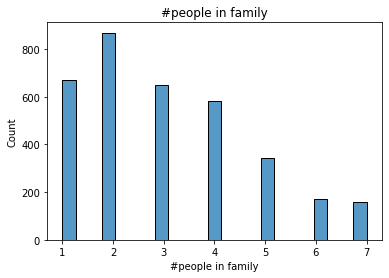

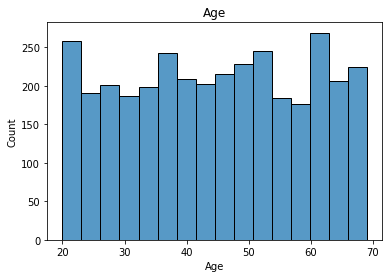

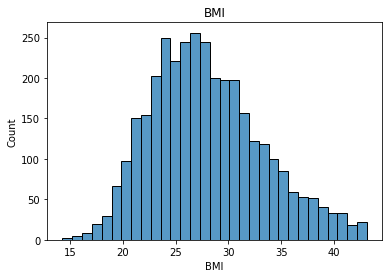

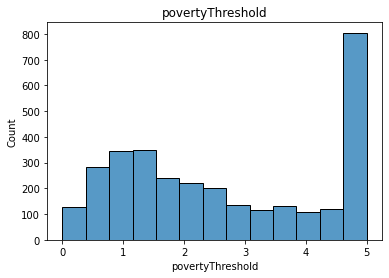

In [82]:
# Univariate analysis of numeric variables
num_vars = ['#people in family','Age','BMI','povertyThreshold']
for var in num_vars:
    sns.histplot(df[var])
    plt.title(var)
    plt.show()

# Univariate analysis of categorical data

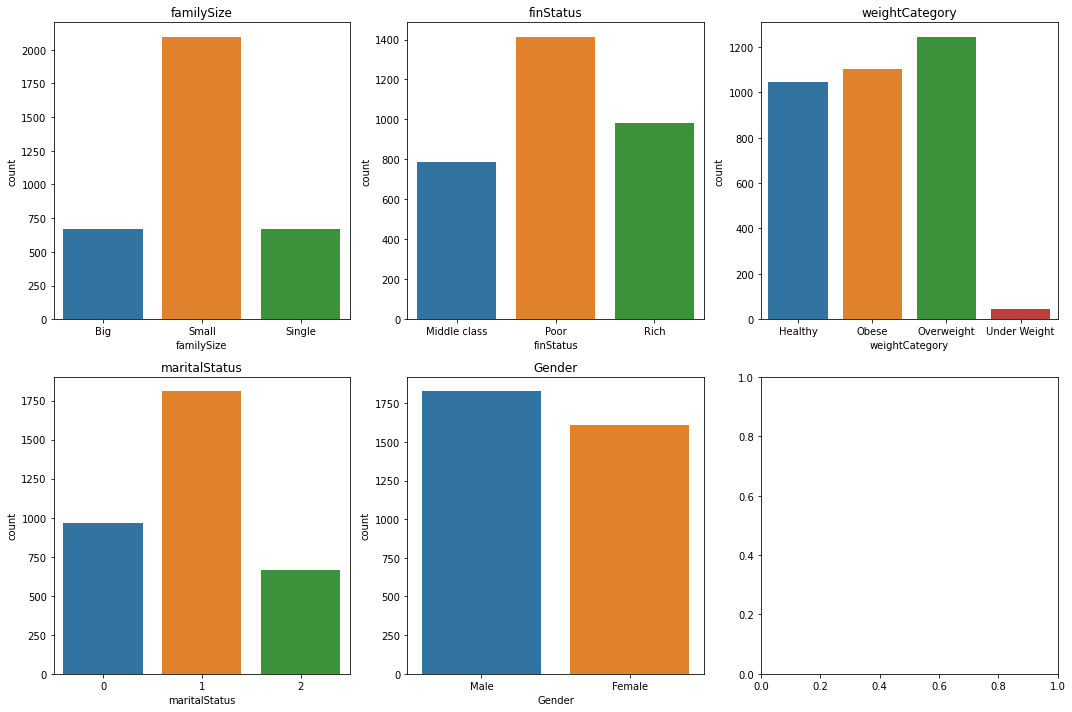

In [83]:
cat_vars = ['familySize', 'finStatus', 'weightCategory', 'maritalStatus', 'Gender']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for var, ax in zip(cat_vars, axes.flatten()):
    sns.countplot(x=var, data=df, ax=ax)
    ax.set_title(var)

plt.tight_layout()
plt.show()

In [84]:
# remove missing values from column A
df.dropna(subset=['finStatus'], inplace=True)

# Bivariate Analysis (categorical vs Numerical)

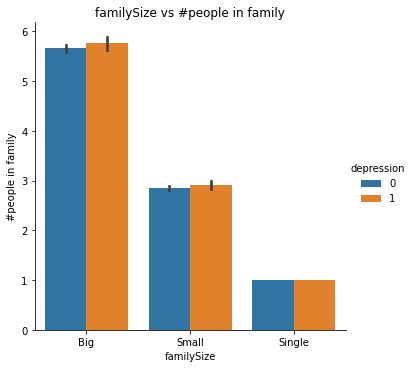

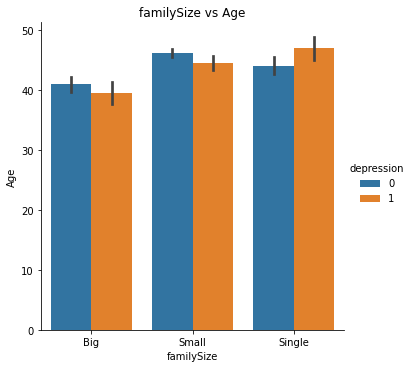

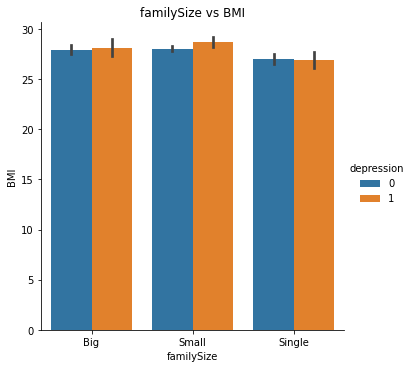

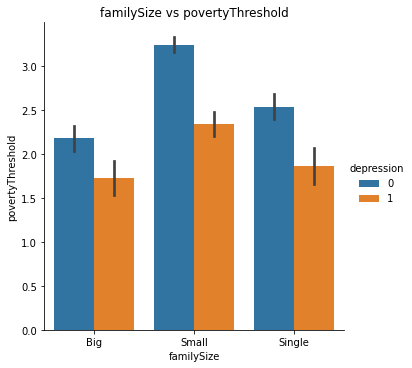

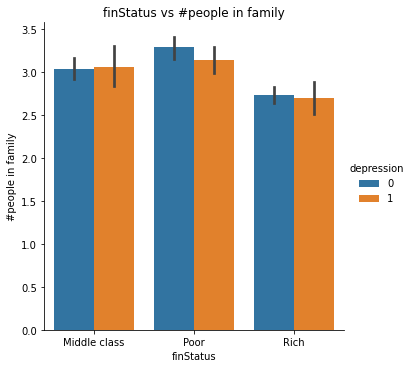

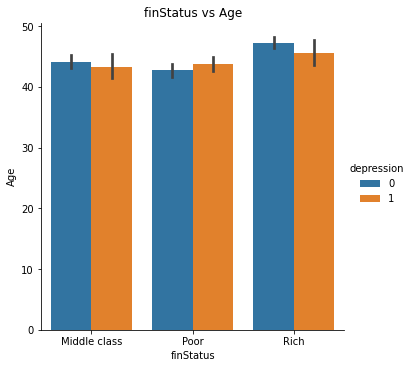

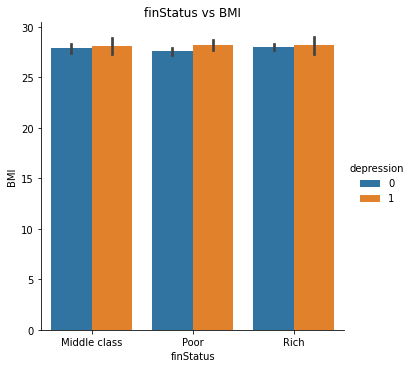

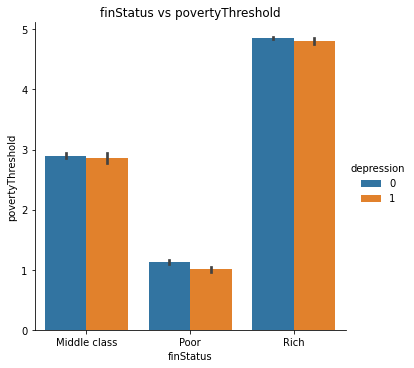

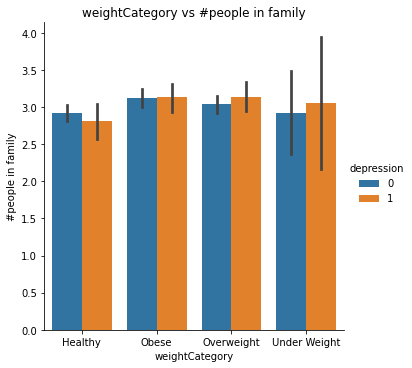

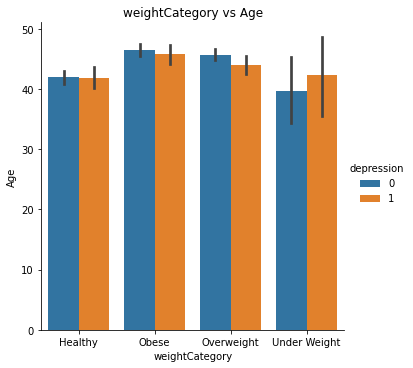

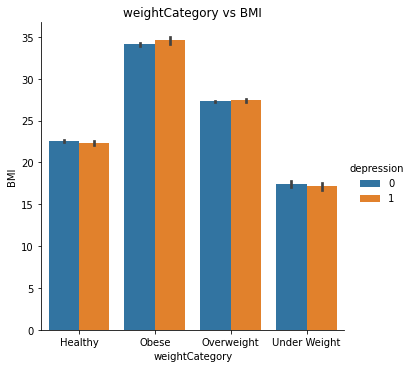

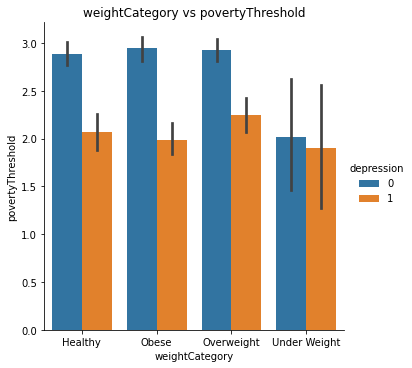

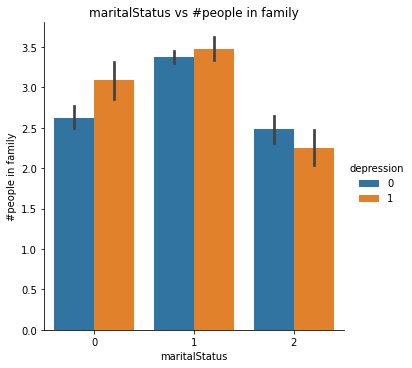

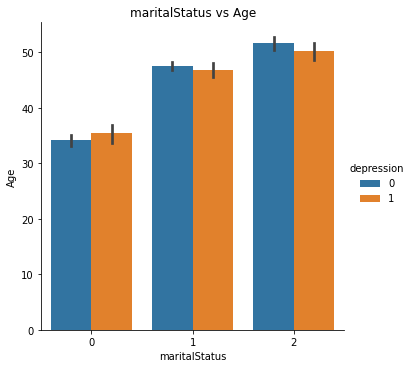

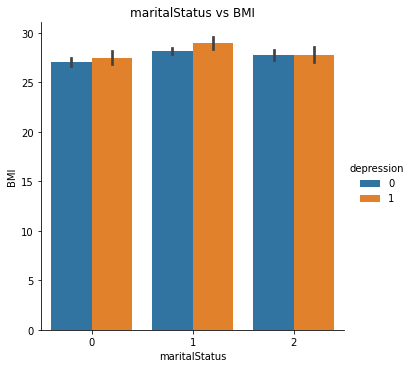

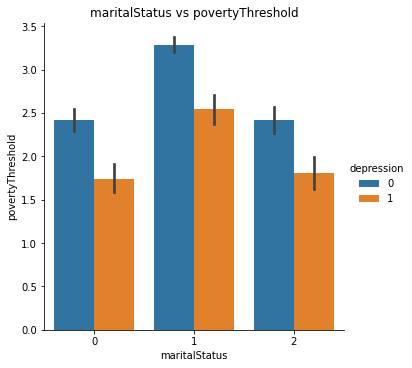

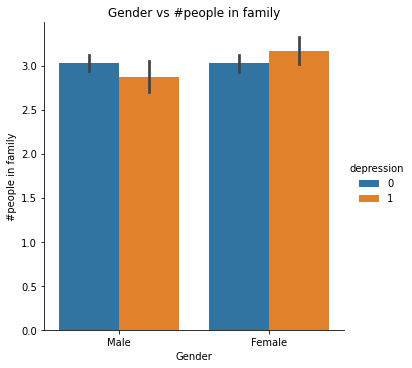

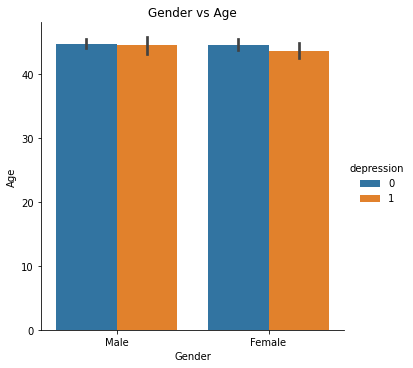

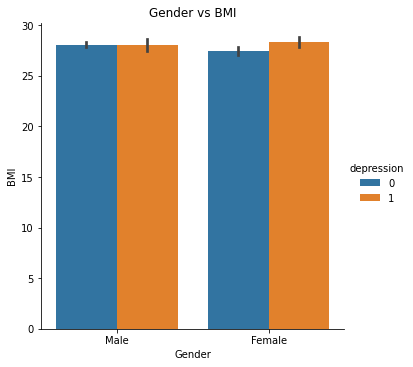

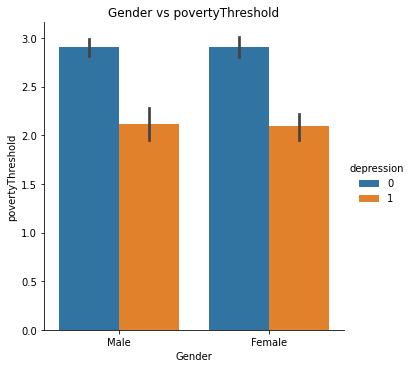

In [85]:
# Bivariate analysis of categorical variables
for cat in cat_vars:
  for num in num_vars:
    sns.catplot(x=cat, y=num, data=df, kind='bar',hue='depression')
    plt.title(cat + " vs " + num)
    plt.show()



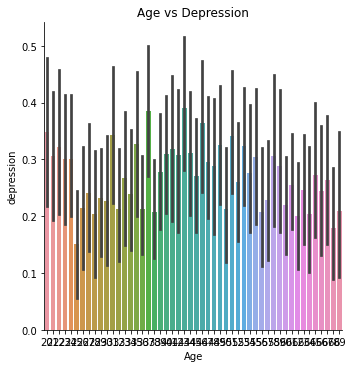

In [86]:
# Bivariate analysis of categorical variables

sns.catplot(x='Age', y='depression', data=df, kind='bar')
plt.title('Age vs Depression')
plt.show()

# Apply K-means with 5 clusters on Age column to create new feature 

In [87]:
from sklearn.cluster import KMeans
# Perform k-means clustering on the Age column
kmeans = KMeans(n_clusters=5)
df['age_cluster'] = kmeans.fit_predict(df[['Age']])


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [88]:
# View the distribution of cluster labels
print(df['age_cluster'].value_counts())

2    698
3    691
1    641
4    578
0    575
Name: age_cluster, dtype: int64


In [89]:
# Define a dictionary to map the cluster labels to new names
cluster_names = {0: '20-30', 1: '30-40', 2: '40-50', 3: '50-60', 4: '60-70'}

# Replace the cluster labels with the new names
df['age_cluster'] = df['age_cluster'].replace(cluster_names)

# View the updated cluster labels
print(df['age_cluster'].value_counts())

40-50    698
50-60    691
30-40    641
60-70    578
20-30    575
Name: age_cluster, dtype: int64


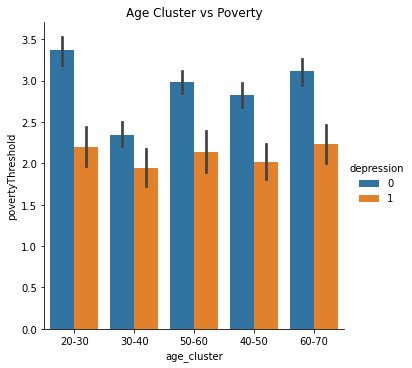

In [90]:
# Bivariate analysis of age-clusters and depression variables

sns.catplot(x='age_cluster', y='povertyThreshold', data=df, kind='bar',hue='depression')
plt.title('Age Cluster vs Poverty')
plt.show()

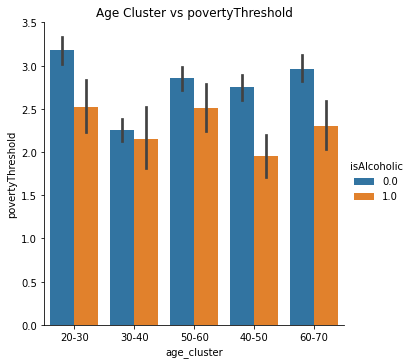

In [91]:
# Bivariate analysis of age-clusters and depression variables

sns.catplot(x='age_cluster', y='povertyThreshold', data=df, kind='bar',hue='isAlcoholic')
plt.title('Age Cluster vs povertyThreshold')
plt.show()

# Box plot (Numerical - Categorical)

<AxesSubplot:xlabel='depression', ylabel='Age'>

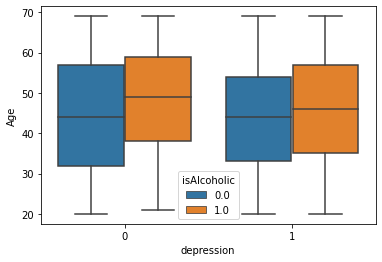

In [92]:
sns.boxplot(x=df['depression'],y=df['Age'],hue=df['isAlcoholic'])

<AxesSubplot:xlabel='maritalStatus', ylabel='povertyThreshold'>

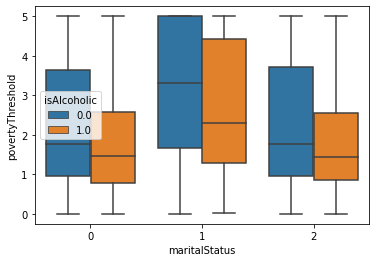

In [93]:
sns.boxplot(x=df['maritalStatus'],y=df['povertyThreshold'],hue=df['isAlcoholic'])

<AxesSubplot:xlabel='CompletedHighSchool', ylabel='povertyThreshold'>

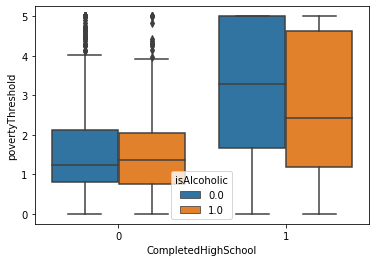

In [113]:
sns.boxplot(x=df['CompletedHighSchool'],y=df['povertyThreshold'],hue=df['isAlcoholic'])

<AxesSubplot:xlabel='CompletedHighSchool', ylabel='povertyThreshold'>

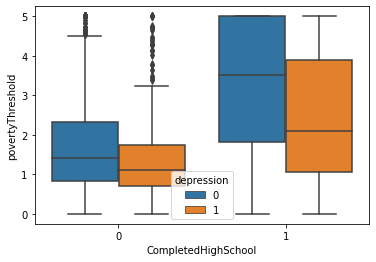

In [115]:
sns.boxplot(x=df['CompletedHighSchool'],y=df['povertyThreshold'],hue=df['depression'])

# Probability Density Function analysis

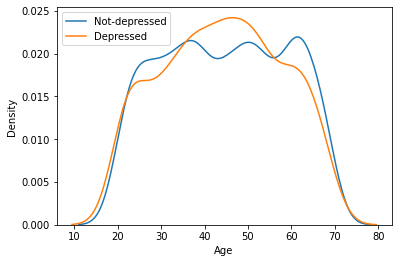

In [116]:
sns.kdeplot(df[df['depression']==0]['Age'],label='Not-depressed')
sns.kdeplot(df[df['depression']==1]['Age'],label='Depressed')
plt.legend()

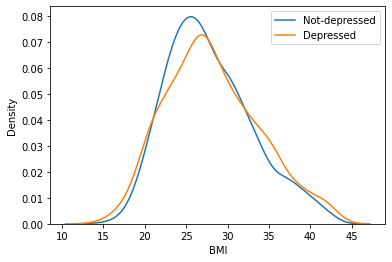

In [121]:
sns.kdeplot(df[df['depression']==0]['BMI'],label='Not-depressed')
sns.kdeplot(df[df['depression']==1]['BMI'],label='Depressed')
plt.legend()

# Heat Maps to understand variation of categories with respect to depression

<AxesSubplot:xlabel='depression-isAlcoholic', ylabel='finStatus-familySize'>

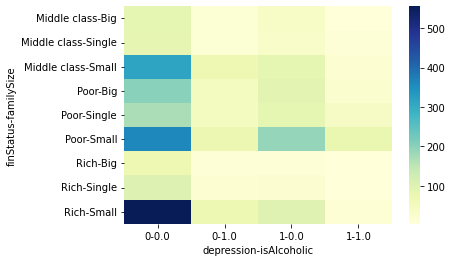

In [122]:
sns.heatmap(pd.crosstab([df['finStatus'],df['familySize']],[df['depression'],df['isAlcoholic']]),cmap="YlGnBu")

<AxesSubplot:xlabel='depression-isAlcoholic', ylabel='weightCategory'>

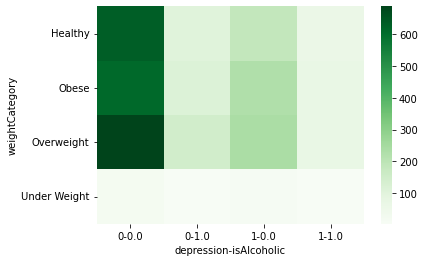

In [124]:
sns.heatmap(pd.crosstab([df['weightCategory']],[df['depression'],df['isAlcoholic']]),cmap="Greens")

<AxesSubplot:xlabel='depression', ylabel='isAlcoholic-Used Drugs'>

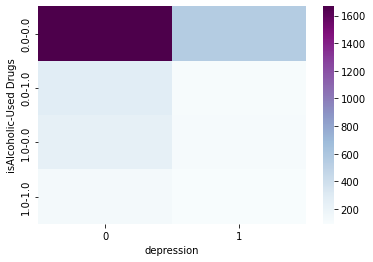

In [98]:
sns.heatmap(pd.crosstab([df['isAlcoholic'],df['Used Drugs']],[df['depression']]),cmap="BuPu")

# Percentage of people in each category suffering with depression

In [99]:
df.groupby('isAlcoholic').mean()['depression']*100

isAlcoholic
0.0    25.345092
1.0    35.304348
Name: depression, dtype: float64

In [100]:
df.groupby('Used Drugs').mean()['depression']*100

Used Drugs
0.0    25.816485
1.0    32.733224
Name: depression, dtype: float64

In [101]:
df.groupby('maritalStatus').mean()['depression']*100

maritalStatus
0    30.987514
1    22.036927
2    35.473515
Name: depression, dtype: float64

In [129]:
df.groupby('maritalStatus').mean()['isAlcoholic']*100

maritalStatus
0    17.139614
1    16.795712
2    22.792937
Name: isAlcoholic, dtype: float64

In [102]:
df.groupby('weightCategory').mean()['depression']*100

weightCategory
Healthy         24.923391
Obese           28.978389
Overweight      26.906223
Under Weight    40.000000
Name: depression, dtype: float64

In [103]:
df.groupby('CompletedHighSchool').mean()['depression']*100

CompletedHighSchool
0    34.177215
1    24.503025
Name: depression, dtype: float64

In [104]:
df.groupby('familySize').mean()['depression']*100

familySize
Big       28.618421
Single    31.338583
Small     25.309278
Name: depression, dtype: float64

In [126]:
df.groupby('finStatus').mean()['depression']*100

finStatus
Middle class    24.746193
Poor            36.395760
Rich            15.714286
Name: depression, dtype: float64

# Correlation matrix


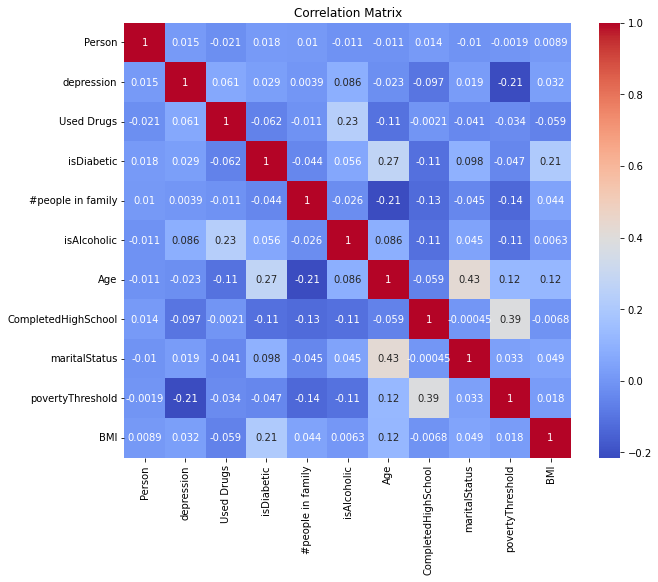

In [106]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix')
plt.show()

